In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
train=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\train_2017.csv',parse_dates=["date"],usecols=[1, 2, 3, 4, 5],dtype={'onpromotion': bool})
test = pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\test.csv',usecols=[0, 1, 2, 3, 4],
    dtype={'onpromotion': bool},parse_dates=["date"])

In [29]:
#抽出掉2个月之内没有train记录的test条目并设为0
test_windows_records=train[train['date']>pd.datetime(2017,6,15)].groupby(['store_nbr','item_nbr']).size().to_frame('windows_records_number')
test_records=test.groupby(['store_nbr','item_nbr']).size().to_frame('records_number')
test_all_records=pd.merge(test_records,test_windows_records,left_index=True,right_index=True,how='left')
test_all_records

records_number  windows_records_number
store_nbr item_nbr                                        
1         96995                 16                    10.0
          99197                 16                    25.0
          103501                16                     NaN
          103520                16                    44.0
          103665                16                    46.0
          105574                16                    57.0
          105575                16                    61.0
          105576                16                     NaN
          105577                16                    30.0
          105693                16                    20.0
          105737                16                    36.0
          105857                16                    59.0
          106716                16                    58.0
          108079                16                    26.0
          108634                16                     7.0
          108696                16                    45.0
          108698                16                    46.0
          108701                16                    38.0
          108786                16                    51.0
          108797                16                    49.0
          108831                16                     NaN
          108833                16                     NaN
          108862                16                    31.0
          108952                16                    40.0
          111223                16                    56.0
          111397                16                    32.0
          112830                16                    50.0
          114778                16                    51.0
          114790                16                    56.0
          114799                16                    32.0
...                            ...                     ...
54        2127921               16                     NaN
          2127992               16                     NaN
          2128628               16                     NaN
          2128799               16                     NaN
          2129334               16                     NaN
          2129350               16                     NaN
          2129387               16                     NaN
          2129515               16                     NaN
          2129616               16                     NaN
          2129678               16                     NaN
          2129786               16                     NaN
          2129790               16                     NaN
          2129892               16                     NaN
          2129994               16                     NaN
          2130131               16                     NaN
          2130219               16                     NaN
          2130265               16                     NaN
          2130352               16                     NaN
          2130474               16                     NaN
          2130521               16                     NaN
          2130526               16                     NaN
          2130553               16                     NaN
          2131010               16                     NaN
          2131572               16                     NaN
          2131699               16                     NaN
          2132163               16                     NaN
          2132318               16                     NaN
          2132945               16                     NaN
          2132957               16                     NaN
          2134244               16                     NaN

[210654 rows x 2 columns]

In [30]:
test_fill0=test_all_records[test_all_records['windows_records_number'].isnull()].copy()
test_putin=test_all_records[test_all_records['windows_records_number'].notnull()].copy()

In [34]:
test_fill0.drop(['records_number'],axis=1,inplace=True)
test_putin.drop(['records_number'],axis=1,inplace=True)

In [36]:
test_fill0

windows_records_number
store_nbr item_nbr                        
1         103501                       NaN
          105576                       NaN
          108831                       NaN
          108833                       NaN
          115894                       NaN
          116279                       NaN
          119193                       NaN
          123927                       NaN
          129759                       NaN
          155499                       NaN
          155500                       NaN
          161288                       NaN
          168931                       NaN
          172995                       NaN
          179579                       NaN
          205381                       NaN
          208530                       NaN
          218728                       NaN
          220432                       NaN
          253103                       NaN
          255198                       NaN
          255199                       NaN
          260628                       NaN
          260893                       NaN
          264305                       NaN
          265257                       NaN
          268446                       NaN
          279125                       NaN
          302824                       NaN
          305074                       NaN
...                                    ...
54        2127921                      NaN
          2127992                      NaN
          2128628                      NaN
          2128799                      NaN
          2129334                      NaN
          2129350                      NaN
          2129387                      NaN
          2129515                      NaN
          2129616                      NaN
          2129678                      NaN
          2129786                      NaN
          2129790                      NaN
          2129892                      NaN
          2129994                      NaN
          2130131                      NaN
          2130219                      NaN
          2130265                      NaN
          2130352                      NaN
          2130474                      NaN
          2130521                      NaN
          2130526                      NaN
          2130553                      NaN
          2131010                      NaN
          2131572                      NaN
          2131699                      NaN
          2132163                      NaN
          2132318                      NaN
          2132945                      NaN
          2132957                      NaN
          2134244                      NaN

[56391 rows x 1 columns]

In [37]:
test_putin

windows_records_number
store_nbr item_nbr                        
1         96995                       10.0
          99197                       25.0
          103520                      44.0
          103665                      46.0
          105574                      57.0
          105575                      61.0
          105577                      30.0
          105693                      20.0
          105737                      36.0
          105857                      59.0
          106716                      58.0
          108079                      26.0
          108634                       7.0
          108696                      45.0
          108698                      46.0
          108701                      38.0
          108786                      51.0
          108797                      49.0
          108862                      31.0
          108952                      40.0
          111223                      56.0
          111397                      32.0
          112830                      50.0
          114778                      51.0
          114790                      56.0
          114799                      32.0
          114800                      50.0
          115267                      42.0
          115611                      60.0
          115693                      55.0
...                                    ...
54        2081056                     47.0
          2081064                     61.0
          2081095                     52.0
          2081142                     14.0
          2081161                     60.0
          2083837                     24.0
          2083859                     21.0
          2084278                     46.0
          2084557                     56.0
          2086882                     58.0
          2087374                     22.0
          2087409                     14.0
          2087543                     27.0
          2087567                      3.0
          2087933                     23.0
          2087978                     61.0
          2088922                     61.0
          2089036                     46.0
          2089339                     60.0
          2099230                     13.0
          2101795                      8.0
          2103250                     18.0
          2105347                     26.0
          2106464                     37.0
          2108569                     38.0
          2109909                      9.0
          2110456                     47.0
          2113343                      8.0
          2113914                     36.0
          2116416                     11.0

[154263 rows x 1 columns]

In [38]:

train_1=train[(train['date']>=pd.datetime(2017,8,1))&(train['date']<=pd.datetime(2017,8,15))].copy().groupby(['store_nbr','item_nbr']).size().to_frame('records_number')
train_1_windows=train[(train['date']>=pd.datetime(2017,6,1))&(train['date']<pd.datetime(2017,8,1))].copy().groupby(['store_nbr','item_nbr']).size().to_frame('windows_records_number')

train_1_records=pd.merge(train_1,train_1_windows,left_index=True,right_index=True,how='left')
train_1_putin=train_1_records[train_1_records['windows_records_number'].notnull()].copy()



In [40]:
timerange1=train[(train['date']>=pd.datetime(2017,8,1))&(train['date']<=pd.datetime(2017,8,15))]
timerange1=timerange1.set_index(["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(level=-1).fillna(0) 

In [41]:
timerange1

unit_sales                                              \
date               2017-08-01 2017-08-02 2017-08-03 2017-08-04 2017-08-05   
store_nbr item_nbr                                                          
1         96995      0.000000   0.693147   1.098612   0.000000   0.000000   
          99197      0.000000   0.000000   0.000000   0.000000   0.693147   
          103520     1.386294   0.693147   1.098612   1.386294   0.000000   
          103665     1.609438   1.098612   1.098612   2.197225   1.386294   
          105574     2.197225   2.197225   1.945910   1.791759   2.079442   
          105575     2.708050   2.197225   2.995732   2.708050   1.791759   
          105577     0.000000   0.000000   0.693147   0.000000   0.000000   
          105693     0.693147   0.000000   0.000000   0.000000   0.000000   
          105737     0.693147   0.000000   0.000000   1.098612   0.693147   
          105857     1.945910   1.791759   1.609438   1.945910   2.302585   
          106716     1.791759   0.693147   1.609438   0.693147   1.098612   
          108079     1.098612   0.000000   0.000000   0.000000   1.098612   
          108696     0.693147   1.386294   1.098612   0.693147   1.098612   
          108698     0.000000   0.000000   0.693147   0.693147   0.693147   
          108701     0.000000   1.098612   0.693147   1.098612   0.693147   
          108786     1.791759   2.197225   1.098612   1.098612   0.693147   
          108797     1.098612   1.791759   1.098612   1.386294   0.693147   
          108862     0.000000   1.386294   0.000000   0.693147   0.693147   
          108952     0.000000   0.000000   0.000000   0.000000   1.098612   
          111223     2.772589   2.708050   1.609438   0.000000   2.484907   
          111397     0.000000   1.098612   0.000000   1.098612   1.609438   
          112830     1.945910   1.791759   1.386294   0.000000   0.000000   
          114778     0.693147   1.386294   0.693147   2.564949   1.098612   
          114790     1.609438   1.945910   0.693147   1.386294   1.386294   
          114799     0.000000   0.000000   1.386294   1.098612   0.693147   
          114800     2.197225   1.386294   1.791759   1.386294   1.098612   
          115267     0.693147   0.000000   0.693147   2.484907   0.693147   
          115611     2.302585   2.079442   2.197225   1.791759   1.609438   
          115693     1.945910   1.609438   1.098612   1.609438   0.000000   
          115720     0.693147   0.693147   0.693147   0.693147   0.000000   
...                       ...        ...        ...        ...        ...   
54        2072545    0.000000   3.713572   0.000000   0.000000   0.000000   
          2081056    1.945910   2.079442   0.693147   1.386294   1.098612   
          2081064    4.330733   3.526361   3.891820   3.761200   3.784190   
          2081095    0.000000   1.609438   0.000000   1.098612   0.693147   
          2081142    1.791759   0.000000   0.693147   1.386294   0.000000   
          2081161    3.367296   3.258097   3.496508   3.713572   2.397895   
          2083837    0.000000   1.098612   2.079442   2.302585   0.000000   
          2083859    0.000000   0.000000   0.000000   0.000000   0.000000   
          2084278    1.098612   0.000000   1.609438   1.386294   0.693147   
          2084557    0.000000   2.079442   1.791759   2.302585   2.079442   
          2086882    1.386294   1.609438   0.693147   0.693147   0.693147   
          2087374    1.098612   1.386294   1.609438   1.098612   2.302585   
          2087409    0.000000   0.693147   1.098612   0.000000   0.000000   
          2087543    0.000000   1.609438   1.791759   0.693147   1.386294   
          2087567    0.000000   0.000000   0.000000   0.000000   0.000000   
          2087978    1.945910   2.944439   1.386294   1.791759   2.302585   
          2088922    2.302585   2.197225   1.609438   1.098612   2.079442   
          2089036    1.609438   1.609438   0.693147   1.386294   1.098612   
          20893

In [39]:
train_1_putin

records_number  windows_records_number
store_nbr item_nbr                                        
1         96995                  5                     7.0
          99197                  3                    34.0
          103520                 9                    48.0
          103665                12                    47.0
          105574                13                    59.0
          105575                15                    61.0
          105577                 8                    34.0
          105693                 6                    19.0
          105737                 9                    40.0
          105857                14                    57.0
          106716                14                    56.0
          108079                 6                    29.0
          108696                13                    44.0
          108698                 9                    51.0
          108701                11                    39.0
          108786                15                    50.0
          108797                15                    46.0
          108862                 9                    32.0
          108952                10                    43.0
          111223                13                    58.0
          111397                 7                    33.0
          112830                10                    51.0
          114778                13                    48.0
          114790                13                    57.0
          114799                 8                    34.0
          114800                13                    50.0
          115267                11                    42.0
          115611                15                    60.0
          115693                13                    55.0
          115720                 7                    49.0
...                            ...                     ...
54        2067056               10                    42.0
          2067123                3                     3.0
          2072545                4                     7.0
          2081056               14                    47.0
          2081064               15                    61.0
          2081095               13                    53.0
          2081142                6                    12.0
          2081161               15                    59.0
          2083837                8                    20.0
          2083859                3                    25.0
          2084278               12                    39.0
          2084557               14                    56.0
          2086882               15                    55.0
          2087374                7                    25.0
          2087409                8                     6.0
          2087543                5                    22.0
          2087978               15                    61.0
          2088922               15                    61.0
          2089036               14                    32.0
          2089339               15                    60.0
          2099230                4                    11.0
          2101795                1                     9.0
          2103250                1                    22.0
          2105347                5                    32.0
          2106464                8                    30.0
          2108569               10                    31.0
          2110456               11                    36.0
          2113343                4                     4.0
          2113914               10                    26.0
          2116416                9                     2.0

[144827 rows x 2 columns]

In [42]:
train_1_y=pd.merge(train_1_putin,timerange1,left_index=True,right_index=True,how='left')

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [43]:
train_1_y

records_number  windows_records_number  \
store_nbr item_nbr                                           
1         96995                  5                     7.0   
          99197                  3                    34.0   
          103520                 9                    48.0   
          103665                12                    47.0   
          105574                13                    59.0   
          105575                15                    61.0   
          105577                 8                    34.0   
          105693                 6                    19.0   
          105737                 9                    40.0   
          105857                14                    57.0   
          106716                14                    56.0   
          108079                 6                    29.0   
          108696                13                    44.0   
          108698                 9                    51.0   
          108701                11                    39.0   
          108786                15                    50.0   
          108797                15                    46.0   
          108862                 9                    32.0   
          108952                10                    43.0   
          111223                13                    58.0   
          111397                 7                    33.0   
          112830                10                    51.0   
          114778                13                    48.0   
          114790                13                    57.0   
          114799                 8                    34.0   
          114800                13                    50.0   
          115267                11                    42.0   
          115611                15                    60.0   
          115693                13                    55.0   
          115720                 7                    49.0   
...                            ...                     ...   
54        2067056               10                    42.0   
          2067123                3                     3.0   
          2072545                4                     7.0   
          2081056               14                    47.0   
          2081064               15                    61.0   
          2081095               13                    53.0   
          2081142                6                    12.0   
          2081161               15                    59.0   
          2083837                8                    20.0   
          2083859                3                    25.0   
          2084278               12                    39.0   
          2084557               14                    56.0   
          2086882               15                    55.0   
          2087374                7                    25.0   
          2087409                8                     6.0   
          2087543                5                    22.0   
          2087978               15                    61.0   
          2088922               15                    61.0   
          2089036               14                    32.0   
          2089339               15                    60.0   
          2099230                4                    11.0   
          2101795                1                     9.0   
          2103250                1                    22.0   
          2105347                5                    32.0   
          2106464                8                    30.0   
          2108569               10                    31.0   
          2110456               11                    36.0   
          2113343                4                     4.0   
          2113914               10                    26.0   
          2116416                9                     2.0   

                    (unit_sales, 2017-08-01 00:00:00)  \
store_nbr item_nbr                                      

In [44]:
train_1_y=timerange1.reindex(index=train_1_putin.index)

In [45]:
train_1_y

unit_sales                                              \
date               2017-08-01 2017-08-02 2017-08-03 2017-08-04 2017-08-05   
store_nbr item_nbr                                                          
1         96995      0.000000   0.693147   1.098612   0.000000   0.000000   
          99197      0.000000   0.000000   0.000000   0.000000   0.693147   
          103520     1.386294   0.693147   1.098612   1.386294   0.000000   
          103665     1.609438   1.098612   1.098612   2.197225   1.386294   
          105574     2.197225   2.197225   1.945910   1.791759   2.079442   
          105575     2.708050   2.197225   2.995732   2.708050   1.791759   
          105577     0.000000   0.000000   0.693147   0.000000   0.000000   
          105693     0.693147   0.000000   0.000000   0.000000   0.000000   
          105737     0.693147   0.000000   0.000000   1.098612   0.693147   
          105857     1.945910   1.791759   1.609438   1.945910   2.302585   
          106716     1.791759   0.693147   1.609438   0.693147   1.098612   
          108079     1.098612   0.000000   0.000000   0.000000   1.098612   
          108696     0.693147   1.386294   1.098612   0.693147   1.098612   
          108698     0.000000   0.000000   0.693147   0.693147   0.693147   
          108701     0.000000   1.098612   0.693147   1.098612   0.693147   
          108786     1.791759   2.197225   1.098612   1.098612   0.693147   
          108797     1.098612   1.791759   1.098612   1.386294   0.693147   
          108862     0.000000   1.386294   0.000000   0.693147   0.693147   
          108952     0.000000   0.000000   0.000000   0.000000   1.098612   
          111223     2.772589   2.708050   1.609438   0.000000   2.484907   
          111397     0.000000   1.098612   0.000000   1.098612   1.609438   
          112830     1.945910   1.791759   1.386294   0.000000   0.000000   
          114778     0.693147   1.386294   0.693147   2.564949   1.098612   
          114790     1.609438   1.945910   0.693147   1.386294   1.386294   
          114799     0.000000   0.000000   1.386294   1.098612   0.693147   
          114800     2.197225   1.386294   1.791759   1.386294   1.098612   
          115267     0.693147   0.000000   0.693147   2.484907   0.693147   
          115611     2.302585   2.079442   2.197225   1.791759   1.609438   
          115693     1.945910   1.609438   1.098612   1.609438   0.000000   
          115720     0.693147   0.693147   0.693147   0.693147   0.000000   
...                       ...        ...        ...        ...        ...   
54        2067056    0.000000   1.386294   0.693147   2.197225   1.609438   
          2067123    0.693147   0.000000   0.000000   0.000000   0.000000   
          2072545    0.000000   3.713572   0.000000   0.000000   0.000000   
          2081056    1.945910   2.079442   0.693147   1.386294   1.098612   
          2081064    4.330733   3.526361   3.891820   3.761200   3.784190   
          2081095    0.000000   1.609438   0.000000   1.098612   0.693147   
          2081142    1.791759   0.000000   0.693147   1.386294   0.000000   
          2081161    3.367296   3.258097   3.496508   3.713572   2.397895   
          2083837    0.000000   1.098612   2.079442   2.302585   0.000000   
          2083859    0.000000   0.000000   0.000000   0.000000   0.000000   
          2084278    1.098612   0.000000   1.609438   1.386294   0.693147   
          2084557    0.000000   2.079442   1.791759   2.302585   2.079442   
          2086882    1.386294   1.609438   0.693147   0.693147   0.693147   
          2087374    1.098612   1.386294   1.609438   1.098612   2.302585   
          2087409    0.000000   0.693147   1.098612   0.000000   0.000000   
          2087543    0.000000   1.609438   1.791759   0.693147   1.386294   
          2087978    1.945910   2.944439   1.386294   1.791759   2.302585   
          2088922    2.302585   2.197225   1.609438   1.098612   2.079442   
          20890

In [ ]:
timerange1=train[(train['date']>=pd.datetime(2017,7,31))&(train['date']<=pd.datetime(2017,8,15))]
timerange1=timerange1.set_index(["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(level=-1).fillna(0)

train_1=timerange1.copy().groupby(['store_nbr','item_nbr']).size().to_frame('records_number')
train_1_windows=train[(train['date']>=pd.datetime(2017,3,31))&(train['date']<pd.datetime(2017,7,31))].copy().groupby(['store_nbr','item_nbr']).size().to_frame('windows_records_number')

train_1_records=pd.merge(train_1,train_1_windows,left_index=True,right_index=True,how='left')
train_1_putin=train_1_records[train_1_records['windows_records_number'].notnull()].copy()

train_1_y=timerange1.reindex(index=train_1_putin.index)

In [54]:
u_items=train_1.reset_index()['item_nbr'].unique()
u_stores=train_1.reset_index()['store_nbr'].unique()
train_1 = train_1.reindex(
    pd.MultiIndex.from_product(
        (u_stores, u_items),
        names=['store_nbr','item_nbr']
    )
).reset_index()

In [57]:
train_1=train_1.fillna(0)

In [80]:
train_1

,store_nbr,item_nbr,records_number
0,1,96995,5.0
1,1,99197,3.0
2,1,103520,9.0
3,1,103665,12.0
4,1,105574,13.0
5,1,105575,15.0
6,1,105577,8.0
7,1,105693,6.0
8,1,105737,9.0
9,1,105857,14.0


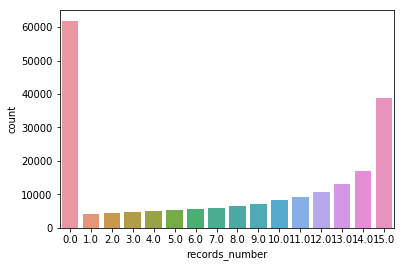

In [59]:
sns.countplot(train_1['records_number'])

In [61]:
train_1_windows

windows_records_number
store_nbr item_nbr                        
1         96995                          7
          99197                         34
          103520                        48
          103665                        47
          105574                        59
          105575                        61
          105577                        34
          105693                        19
          105737                        40
          105857                        57
          106716                        56
          108079                        29
          108634                        15
          108696                        44
          108698                        51
          108701                        39
          108786                        50
          108797                        46
          108862                        32
          108952                        43
          111223                        58
          111397                        33
          112830                        51
          114778                        48
          114790                        57
          114799                        34
          114800                        50
          115267                        42
          115611                        60
          115693                        55
...                                    ...
54        2067123                        3
          2072545                        7
          2081056                       47
          2081064                       61
          2081095                       53
          2081142                       12
          2081161                       59
          2083837                       20
          2083859                       25
          2084278                       39
          2084557                       56
          2086882                       55
          2087374                       25
          2087409                        6
          2087543                       22
          2087933                       31
          2087978                       61
          2088922                       61
          2089036                       32
          2089339                       60
          2099230                       11
          2101795                        9
          2103250                       22
          2105347                       32
          2106464                       30
          2108569                       31
          2110456                       36
          2113343                        4
          2113914                       26
          2116416                        2

[155258 rows x 1 columns]

In [63]:
train_1_records=pd.merge(train_1.reset_index(),train_1_windows.reset_index(),on=['item_nbr','store_nbr'],how='left')
train_1_records

,index,store_nbr,item_nbr,records_number,windows_records_number
0,0,1,96995,5.0,7.0
1,1,1,99197,3.0,34.0
2,2,1,103520,9.0,48.0
3,3,1,103665,12.0,47.0
4,4,1,105574,13.0,59.0
5,5,1,105575,15.0,61.0
6,6,1,105577,8.0,34.0
7,7,1,105693,6.0,19.0
8,8,1,105737,9.0,40.0
9,9,1,105857,14.0,57.0


In [64]:
train_1_records['windows_records_number']=train_1_records['windows_records_number']/4

In [67]:
train_1_records.fillna(0,inplace=True)

In [70]:
train_1_records['windows_records_number']=round(train_1_records['windows_records_number'])

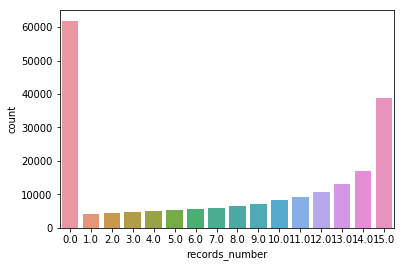

In [71]:
sns.countplot(train_1_records['records_number'])

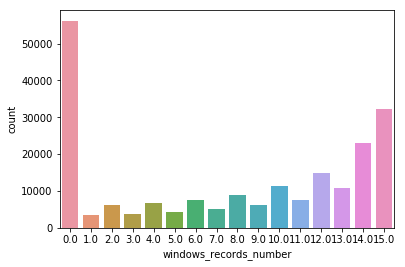

In [72]:
sns.countplot(train_1_records['windows_records_number'])

In [76]:
train_1_records[(train_1_records['records_number']==0) & (train_1_records['windows_records_number']!=0)] #8062 rows

,index,store_nbr,item_nbr,records_number,windows_records_number
2994,2994,1,158788,0.0,8.0
2995,2995,1,158789,0.0,10.0
2996,2996,1,164647,0.0,12.0
2997,2997,1,169104,0.0,2.0
3001,3001,1,307740,0.0,2.0
3002,3002,1,310671,0.0,6.0
3003,3003,1,362035,0.0,2.0
3004,3004,1,402299,0.0,1.0
3006,3006,1,428394,0.0,2.0
3007,3007,1,456870,0.0,5.0


In [77]:
train_1_records[(train_1_records['records_number']!=0) & (train_1_records['windows_records_number']!=0)] #143879 rows

,index,store_nbr,item_nbr,records_number,windows_records_number
0,0,1,96995,5.0,2.0
1,1,1,99197,3.0,8.0
2,2,1,103520,9.0,12.0
3,3,1,103665,12.0,12.0
4,4,1,105574,13.0,15.0
5,5,1,105575,15.0,15.0
6,6,1,105577,8.0,8.0
7,7,1,105693,6.0,5.0
8,8,1,105737,9.0,10.0
9,9,1,105857,14.0,14.0


In [78]:
train_1_records[(train_1_records['records_number']==0) & (train_1_records['windows_records_number']==0)] #53807 rows

,index,store_nbr,item_nbr,records_number,windows_records_number
2990,2990,1,108831,0.0,0.0
2991,2991,1,115894,0.0,0.0
2992,2992,1,116279,0.0,0.0
2993,2993,1,123927,0.0,0.0
2998,2998,1,208530,0.0,0.0
2999,2999,1,253103,0.0,0.0
3000,3000,1,265257,0.0,0.0
3005,3005,1,404454,0.0,0.0
3008,3008,1,463816,0.0,0.0
3009,3009,1,464907,0.0,0.0


In [79]:
train_1_records[(train_1_records['records_number']!=0) & (train_1_records['windows_records_number']==0)] #2368 rows

,index,store_nbr,item_nbr,records_number,windows_records_number
41,41,1,119187,11.0,0.0
419,419,1,437609,4.0,0.0
615,615,1,586911,1.0,0.0
775,775,1,770511,1.0,0.0
821,821,1,812728,4.0,0.0
987,987,1,906980,1.0,0.0
1085,1085,1,979553,7.0,0.0
1125,1125,1,1020940,1.0,0.0
1192,1192,1,1050370,1.0,0.0
1291,1291,1,1114754,1.0,0.0


In [ ]:
'''
21万条5.3万都没出现，14.3万都出现了，8千曾经出现现在没了，两千曾经一直没有而现在出现了
我觉得把3，5,10,15,30,60,90出现次数（率？）作为一个特征应该挺准的，0项的影响？然后统统去除掉三月之内没出现过的
'''

In [75]:
train[train['item_nbr']==158789]

,date,store_nbr,item_nbr,unit_sales,onpromotion
1731,2017-01-02,1,158789,1.098612,False
3244,2017-01-02,2,158789,1.945910,False
5828,2017-01-02,3,158789,2.639057,False
8676,2017-01-02,4,158789,0.693147,False
13334,2017-01-02,6,158789,3.663562,False
15985,2017-01-02,7,158789,1.945910,False
18438,2017-01-02,8,158789,2.397895,False
21266,2017-01-02,9,158789,3.663562,False
23642,2017-01-02,10,158789,2.302585,False
25228,2017-01-02,11,158789,4.290459,False


In [81]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-01-01,25,99197,0.693147,False
1,2017-01-01,25,103665,2.079442,False
2,2017-01-01,25,105574,0.693147,False
3,2017-01-01,25,105857,1.609438,False
4,2017-01-01,25,106716,1.098612,False
5,2017-01-01,25,108698,1.098612,False
6,2017-01-01,25,108786,0.693147,False
7,2017-01-01,25,108797,0.693147,False
8,2017-01-01,25,108862,0.693147,False
9,2017-01-01,25,108952,1.098612,False


In [91]:
timerange1

unit_sales                                              \
date               2017-08-01 2017-08-02 2017-08-03 2017-08-04 2017-08-05   
store_nbr item_nbr                                                          
1         96995      0.000000   0.693147   1.098612   0.000000   0.000000   
          99197      0.000000   0.000000   0.000000   0.000000   0.693147   
          103520     1.386294   0.693147   1.098612   1.386294   0.000000   
          103665     1.609438   1.098612   1.098612   2.197225   1.386294   
          105574     2.197225   2.197225   1.945910   1.791759   2.079442   
          105575     2.708050   2.197225   2.995732   2.708050   1.791759   
          105577     0.000000   0.000000   0.693147   0.000000   0.000000   
          105693     0.693147   0.000000   0.000000   0.000000   0.000000   
          105737     0.693147   0.000000   0.000000   1.098612   0.693147   
          105857     1.945910   1.791759   1.609438   1.945910   2.302585   
          106716     1.791759   0.693147   1.609438   0.693147   1.098612   
          108079     1.098612   0.000000   0.000000   0.000000   1.098612   
          108696     0.693147   1.386294   1.098612   0.693147   1.098612   
          108698     0.000000   0.000000   0.693147   0.693147   0.693147   
          108701     0.000000   1.098612   0.693147   1.098612   0.693147   
          108786     1.791759   2.197225   1.098612   1.098612   0.693147   
          108797     1.098612   1.791759   1.098612   1.386294   0.693147   
          108862     0.000000   1.386294   0.000000   0.693147   0.693147   
          108952     0.000000   0.000000   0.000000   0.000000   1.098612   
          111223     2.772589   2.708050   1.609438   0.000000   2.484907   
          111397     0.000000   1.098612   0.000000   1.098612   1.609438   
          112830     1.945910   1.791759   1.386294   0.000000   0.000000   
          114778     0.693147   1.386294   0.693147   2.564949   1.098612   
          114790     1.609438   1.945910   0.693147   1.386294   1.386294   
          114799     0.000000   0.000000   1.386294   1.098612   0.693147   
          114800     2.197225   1.386294   1.791759   1.386294   1.098612   
          115267     0.693147   0.000000   0.693147   2.484907   0.693147   
          115611     2.302585   2.079442   2.197225   1.791759   1.609438   
          115693     1.945910   1.609438   1.098612   1.609438   0.000000   
          115720     0.693147   0.693147   0.693147   0.693147   0.000000   
...                       ...        ...        ...        ...        ...   
54        2072545    0.000000   3.713572   0.000000   0.000000   0.000000   
          2081056    1.945910   2.079442   0.693147   1.386294   1.098612   
          2081064    4.330733   3.526361   3.891820   3.761200   3.784190   
          2081095    0.000000   1.609438   0.000000   1.098612   0.693147   
          2081142    1.791759   0.000000   0.693147   1.386294   0.000000   
          2081161    3.367296   3.258097   3.496508   3.713572   2.397895   
          2083837    0.000000   1.098612   2.079442   2.302585   0.000000   
          2083859    0.000000   0.000000   0.000000   0.000000   0.000000   
          2084278    1.098612   0.000000   1.609438   1.386294   0.693147   
          2084557    0.000000   2.079442   1.791759   2.302585   2.079442   
          2086882    1.386294   1.609438   0.693147   0.693147   0.693147   
          2087374    1.098612   1.386294   1.609438   1.098612   2.302585   
          2087409    0.000000   0.693147   1.098612   0.000000   0.000000   
          2087543    0.000000   1.609438   1.791759   0.693147   1.386294   
          2087567    0.000000   0.000000   0.000000   0.000000   0.000000   
          2087978    1.945910   2.944439   1.386294   1.791759   2.302585   
          2088922    2.302585   2.197225   1.609438   1.098612   2.079442   
          2089036    1.609438   1.609438   0.693147   1.386294   1.098612   
          20893

In [92]:
d=pd.merge(train_1.reset_index(),timerange1.reset_index(),on=['item_nbr','store_nbr'],how='left')

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\pandas\core\reshape\merge.py:862: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  self.right = self.right.drop(right_drop, axis=1)


In [97]:
d.columns[4:]

Index([('unit_sales', 2017-08-01 00:00:00),
       ('unit_sales', 2017-08-02 00:00:00),
       ('unit_sales', 2017-08-03 00:00:00),
       ('unit_sales', 2017-08-04 00:00:00),
       ('unit_sales', 2017-08-05 00:00:00),
       ('unit_sales', 2017-08-06 00:00:00),
       ('unit_sales', 2017-08-07 00:00:00),
       ('unit_sales', 2017-08-08 00:00:00),
       ('unit_sales', 2017-08-09 00:00:00),
       ('unit_sales', 2017-08-10 00:00:00),
       ('unit_sales', 2017-08-11 00:00:00),
       ('unit_sales', 2017-08-12 00:00:00),
       ('unit_sales', 2017-08-13 00:00:00),
       ('unit_sales', 2017-08-14 00:00:00),
       ('unit_sales', 2017-08-15 00:00:00)],
      dtype='object')

In [100]:
d['means']=0
d['cumsmum']=0
for i in d.columns[4:]:
    d['cumsmum']=d['cumsmum']+d[i]
d['means']=d['cumsmum']/15
d['means_withoutnull']=d['cumsmum']/d['records_number']

In [101]:
d

,index,store_nbr,item_nbr,records_number,"(unit_sales, 2017-08-01 00:00:00)","(unit_sales, 2017-08-02 00:00:00)","(unit_sales, 2017-08-03 00:00:00)","(unit_sales, 2017-08-04 00:00:00)","(unit_sales, 2017-08-05 00:00:00)","(unit_sales, 2017-08-06 00:00:00)",...,"(unit_sales, 2017-08-09 00:00:00)","(unit_sales, 2017-08-10 00:00:00)","(unit_sales, 2017-08-11 00:00:00)","(unit_sales, 2017-08-12 00:00:00)","(unit_sales, 2017-08-13 00:00:00)","(unit_sales, 2017-08-14 00:00:00)","(unit_sales, 2017-08-15 00:00:00)",means,cumsmum,means_withoutnull
0,0,1,96995,5.0,0.000000,0.693147,1.098612,0.000000,0.000000,1.098612,...,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.624284,9.364262,1.872852
1,1,1,99197,3.0,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,...,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385383,5.780744,1.926915
2,2,1,103520,9.0,1.386294,0.693147,1.098612,1.386294,0.000000,0.000000,...,0.000000,1.386294,0.693147,0.693147,0.693147,0.000000,0.000000,1.255517,18.832757,2.092529
3,3,1,103665,12.0,1.609438,1.098612,1.098612,2.197225,1.386294,0.693147,...,2.079442,2.302585,1.098612,0.000000,0.000000,0.693147,0.693147,2.139850,32.097748,2.674812
4,4,1,105574,13.0,2.197225,2.197225,1.945910,1.791759,2.079442,0.000000,...,1.945910,2.397895,1.791759,1.791759,0.000000,1.386294,1.609438,3.334109,50.011636,3.847049
5,5,1,105575,15.0,2.708050,2.197225,2.995732,2.708050,1.791759,1.609438,...,2.484907,2.484907,2.079442,2.708050,1.609438,2.564949,2.197225,4.808457,72.126855,4.808457
6,6,1,105577,8.0,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,...,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,1.098612,0.885839,13.287579,1.660947
7,7,1,105693,6.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.098612,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147,0.608580,9.128696,1.521449
8,8,1,105737,9.0,0.693147,0.000000,0.000000,1.098612,0.693147,0.000000,...,1.791759,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,1.363641,20.454617,2.272735
9,9,1,105857,14.0,1.945910,1.791759,1.609438,1.945910,2.302585,2.079442,...,1.609438,1.609438,0.693147,1.386294,0.693147,1.945910,2.708050,3.283074,49.246109,3.517579


In [102]:
d.groupby('records_number')['cumsmum'].describe()

,count,mean,std,min,25%,50%,75%,max
records_number,,,,,,,,
0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,4278.0,1.916646,1.041584,0.000000,1.386294,1.386294,2.197225,15.376911
2.0,4351.0,3.894697,1.722351,0.913295,2.772589,3.583519,4.394449,20.924528
3.0,4682.0,5.814292,2.167354,1.808133,4.158883,4.969813,6.356108,21.988135
4.0,4983.0,7.918562,2.800890,3.334307,6.356108,7.167038,8.553332,35.155593
5.0,5341.0,10.131077,3.548549,4.201201,7.742402,9.128696,11.058858,55.836329
6.0,5585.0,12.513333,4.290082,3.109438,9.939627,11.325921,13.733867,63.211366
7.0,5956.0,15.017123,4.925181,4.442525,11.901285,13.733867,16.295734,61.204922
8.0,6588.0,17.631824,5.559467,4.920065,14.098510,16.295734,19.376624,95.581576


In [103]:
d.groupby('records_number')['means_withoutnull'].describe()

,count,mean,std,min,25%,50%,75%,max
records_number,,,,,,,,
0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,4278.0,1.916646,1.041584,0.000000,1.386294,1.386294,2.197225,15.376911
2.0,4351.0,1.947349,0.861176,0.456647,1.386294,1.791759,2.197225,10.462264
3.0,4682.0,1.938097,0.722451,0.602711,1.386294,1.656604,2.118703,7.329378
4.0,4983.0,1.979641,0.700222,0.833577,1.589027,1.791759,2.138333,8.788898
5.0,5341.0,2.026215,0.709710,0.840240,1.548480,1.825739,2.211772,11.167266
6.0,5585.0,2.085556,0.715014,0.518240,1.656604,1.887653,2.288978,10.535228
7.0,5956.0,2.145303,0.703597,0.634646,1.700184,1.961981,2.327962,8.743560
8.0,6588.0,2.203978,0.694933,0.615008,1.762314,2.036967,2.422078,11.947697


In [ ]:
'''
0应该是要以同样的方式去掉比较好？问题来了，为什么销量要平滑，根本就不是Y啊，Y现在的分布很变态
'''

In [104]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-01-01,25,99197,0.693147,False
1,2017-01-01,25,103665,2.079442,False
2,2017-01-01,25,105574,0.693147,False
3,2017-01-01,25,105857,1.609438,False
4,2017-01-01,25,106716,1.098612,False
5,2017-01-01,25,108698,1.098612,False
6,2017-01-01,25,108786,0.693147,False
7,2017-01-01,25,108797,0.693147,False
8,2017-01-01,25,108862,0.693147,False
9,2017-01-01,25,108952,1.098612,False
